# Research assignment 3

[Jovana Ramos]

[Exploring the GSS 2018 Data] 

[03/04/2020]

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use 
    either the General Social Survey 2018 or the Grant and Loan Repayment data. 
My dependent variable for this assignment is years of school completed. The variable measures the respondents’ years of education and it ranges from 0-20 years of education.
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
I’m interested in the respondents’ age, race, sex, and income.
Race- nominal
Age- interval 
Sex- nominal
Income-interval

    C. What are your control variables? Are they interval ratio or nominal? Why?
My control variable is the respondents' incomes. 
Income-interval

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
I hypothesize that white respondents will have more years of education than the other two groups.
I hypothesize that older respondents will have more years of education than younger respondents.
I hypothesize that male respondents will have more years of education than female respondents.


## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [2]:
clear
cd C:\Users\Jovis\Desktop\SOC_211
set more off
log using C:\Users\Jovis\Desktop\SOC_211\Assignment_3.log, replace
use GSS2018w6.dta, clear
describe
codebook



C:\Users\Jovis\Desktop\SOC_211


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
      name:  <unnamed>
       log:  C:\Users\Jovis\Desktop\SOC_211\Assignment_3.log
  log type:  text
 opened on:   3 Mar 2020, 20:12:25



Contains data from GSS2018w6.dta
  obs:         2,348                          
 vars:             8                          26 Feb 2020 09:54
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
-------------------------------------------------------------------

## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show

The first scatterplot shows that males and females in the data have the same years of education. In addition, White and the group Other have the same years of education. The third scatterplot shows that people between the ages of 20 and 90 have from 10-15 years of education. The last scatterplot shows that the data is most concentrated where respondents between the age of 15 and 77 earn 0-25,000 dollars.

In [6]:
foreach x of var sex race realrinc age {
 qui graph twoway (scatter educ `x') (lfit educ `x', color(red)), name(`x', replace) legend(off) ytitle(Education) scheme(plotplainblind)
}

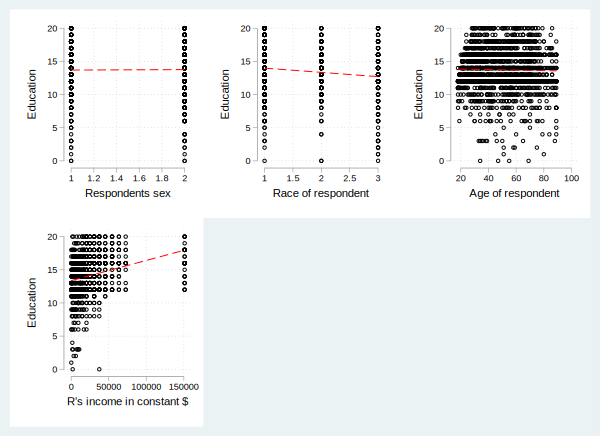

In [7]:
graph combine sex race age realrinc, col(3) 

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. Write bullet points or a short paragraph summarizing what the matrix shows.
The matrix shows that there are 1,357 number of observations. The estimate intercept of 13.32 is not meaningful because there are no participants that associate with all covariates. It also shows that for every year of education a male gains women gain .65 years of education.

In [8]:
reg educ i.sex i.race realrinc age 


      Source |       SS           df       MS      Number of obs   =     1,357
-------------+----------------------------------   F(5, 1351)      =     41.54
       Model |  1473.39394         5  294.678789   Prob > F        =    0.0000
    Residual |  9584.92735     1,351  7.09469086   R-squared       =    0.1332
-------------+----------------------------------   Adj R-squared   =    0.1300
       Total |  11058.3213     1,356   8.1551042   Root MSE        =    2.6636

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
         sex |
     female  |   .6512872   .1477166     4.41   0.000     .3615083     .941066
             |
        race |
      black  |  -.1481433   .1992785    -0.74   0.457    -.5390722    .2427856
      other  |  -1.372885   .2256788    -6.08   0.000    -1.815604   -.9301659
     

## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
 I think linear regression can test whether white participants have higher levels of education.
    
    B. Which variables are included in each model
 In the linear regression model I would include race and years of education completed.
    
    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships
 Adding other variables to the models, can test for certain relationships by showing that even if the variable is added there is a still a strong relationship between the dependent and independent variable.

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

In [11]:
reg educ realrinc
reg educ i.sex i.race 



      Source |       SS           df       MS      Number of obs   =     1,362
-------------+----------------------------------   F(1, 1360)      =    142.60
       Model |  1050.01759         1  1050.01759   Prob > F        =    0.0000
    Residual |  10014.1939     1,360  7.36337784   R-squared       =    0.0949
-------------+----------------------------------   Adj R-squared   =    0.0942
       Total |  11064.2115     1,361  8.12947205   Root MSE        =    2.7136

------------------------------------------------------------------------------
        educ |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
    realrinc |   .0000304   2.55e-06    11.94   0.000     .0000254    .0000354
       _cons |   13.37189    .097261   137.48   0.000     13.18109    13.56268
------------------------------------------------------------------------------


      Source |       SS           df       MS  

## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook in HTML (with %html magic) and as an RTF file

In [12]:
est clear

quietly eststo: reg educ age
quietly eststo: reg educ age i.sex i.race

In [13]:
%html
esttab, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "education attainment" 2.sex "female" 2.race "black" 3.race "other race") html

This front-end or document format cannot display HTML

In [16]:
qui esttab using rft, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2" "Model 3") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "education attainment" 2.sex "female" 2.race "black" 3.race "other race")

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
When examining the models, it looks like there is a negative association among education and race. I wasn't expecting for there to be a negative association between age and education in model one.

    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
When examining models, there seems to be a negative association between education and race. This only applies to the participants who identify as Black and Other.

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
I think the variable father's socioeconmic status should be included that way I can control for any intervening relationships between years of education and sex.     
  